<a href="https://colab.research.google.com/github/Shezan57/LLM/blob/main/rag_using_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import userdata
import os
os.environ["GOOGLE_API_KEY"] = userdata.get('google_api_key')

In [21]:
!pip install -q youtube-transcript-api langchain-community faiss-cpu tiktoken python-dotenv

In [22]:
!pip install -q -U google-genai

In [23]:
!pip install -U langchain-google-genai

In [24]:
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled
from langchain.text_splitter import RecursiveCharacterTextSplitter
from google import genai
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

## Step 1 Indexing

Collect Transcript

In [25]:
video_id = "Gfr50f6ZBvo"  # only the id not full url
try:
  transcript_list = YouTubeTranscriptApi.get_transcript(video_id, languages=["en"])

  # flatten it to plain text
  transcript = " ".join(chunk["text"] for chunk in transcript_list)
  print(transcript)


except TranscriptsDisabled:
  print("Transcript is disabled for this video.")

the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough 

In [26]:
print(len(transcript))

133836


Text Splitting

In [27]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.create_documents([transcript])

In [ ]:
len(chunks)

168

In [ ]:
chunks[0]

Embedding Generation and Storing in Vector Store

In [33]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
vector_store = FAISS.from_documents(chunks, embeddings)

In [34]:
vector_store.index_to_docstore_id

{0: '22d7dc3f-6232-4a19-af92-65b9bf3ac96a',
 1: 'd7309243-2fac-4a22-8dd6-548c169b9cfa',
 2: '48c9ab66-1d26-41e2-965a-33e85262d4f5',
 3: 'c7a54643-bb64-49fd-b0d8-460baf91d829',
 4: '09961e10-4388-4f7a-8fca-48e5100f45a8',
 5: '8e5bf409-c3d9-44a9-8f24-781100482b1d',
 6: 'a2281647-a935-480d-9f52-ef3f7a22ce26',
 7: 'c61aa89b-dd50-400e-8a1e-9263dbac219e',
 8: 'ff98e169-1ecc-4c46-84d4-9136efd93fd7',
 9: 'c0d4295a-d6c8-4ee1-9223-37bc17907936',
 10: '2d3d4b15-d1bd-4952-a54c-b3ca8be83b5c',
 11: '817f8f7d-2734-4cd9-add2-fc80d9e0e2aa',
 12: '1693abb5-4a63-44db-b438-0a655bc5c821',
 13: '4b703c9a-e7f2-4dcd-9388-6dbdef909f73',
 14: 'c1559669-b37e-4b8f-94e5-65e892055fa6',
 15: '91b32474-5a39-4065-a7d8-282b9aa2f366',
 16: 'ed5ecf93-1fef-4720-bb57-6adbde14319c',
 17: '5586d178-d44a-4661-9344-37a644307768',
 18: '8017b8f1-4ed3-4dd8-a456-aa3e91c1612e',
 19: 'fe849f69-b680-45b0-a63b-bedc6cd26987',
 20: 'd4d2844d-e931-4f42-a596-c1c2d4683f9a',
 21: 'edfb0a18-ece2-49c9-bf66-6ff86c16e715',
 22: '7b048688-b48c-

In [36]:
vector_store.get_by_ids(['8bd5e577-ae2f-441f-9caa-57976ed4eb68'])

[Document(id='8bd5e577-ae2f-441f-9caa-57976ed4eb68', metadata={}, page_content="potentially the hundreds there should be would be uniform in this way right it could be a violent dictatorship that the the people the alien civilizations that uh become successful become um [Music] gain the ability to be destructive an order of magnitude more destructive but of course the the sad thought well either humans are very special we took a lot of leaps that arrived at what it means to be human yeah um there's a question there which was the hardest which was the most special but also if others have reached this level and maybe many others have reached this level the great filter that prevented them from going farther to becoming a multi-planetary species or reaching out into the stars and those are really important questions for us whether um whether there's other alien civilizations out there or not this is very useful for us to think about if we destroy ourselves how will we do it and how easy i

## Step 2 Retrieval

In [37]:
retriever = vector_store.as_retriever(search_type='similarity', search_kwargs={'k': 4})

In [38]:
retriever

VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7db2b74c2f10>, search_kwargs={'k': 4})

In [39]:
retriever.invoke("What is deepmind")

[Document(id='b40f63f8-8f1c-4c1f-963a-90952af7ed5a', metadata={}, page_content='i used to discuss um uh uh what were the sort of founding tenets of deep mind and it was very various things one was um algorithmic advances so deep learning you know jeff hinton and cohen just had just sort of invented that in academia but no one in industry knew about it uh we love reinforcement learning we thought that could be scaled up but also understanding about the human brain had advanced um quite a lot uh in the decade prior with fmri machines and other things so we could get some good hints about architectures and algorithms and and sort of um representations maybe that the brain uses so as at a systems level not at a implementation level um and then the other big things were compute and gpus right so we could see a compute was going to be really useful and it got to a place where it became commoditized mostly through the games industry and and that could be taken advantage of and then the final 

## Step 3 Augmentation

In [40]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp", temperature=0.2)

In [41]:
prompt = PromptTemplate(
    template="""
    You are a helpful assistant and a good document analyzer,
    Here contexts (transcripts) are fetched from youtube videos,
    answer Only from the provided transcript context,
    if the context is insufficient, just say you don't know,

    {context},
    Question: {question}
    """,
    input_variables=["context", "question"]
)


In [42]:
question = "is the topic of aliens discussed in this video? if yes then what was discussed"
retrived_docs = retriever.invoke(question)

In [43]:
context_text = "\n\n".join(doc.page_content for doc in retrived_docs)

In [44]:
context_text

"thoughts it could be some interactions with our mind that we think are originating from us is actually something that uh is coming from other life forms elsewhere consciousness itself might be that it could be but i don't see any sensible argument to the why why would all of the alien species be using this way yes some of them will be more primitive they would be close to our level you know there would there should be a whole sort of normal distribution of these things right some would be aggressive some would be you know curious others would be very stoical and philosophical because you know maybe they're a million years older than us but it's not it shouldn't be like what i mean one one alien civilization might be like that communicating thoughts and others but i don't see why you know potentially the hundreds there should be would be uniform in this way right it could be a violent dictatorship that the the people the alien civilizations that uh become successful become um [Music]\n

In [45]:
final_prompt = prompt.invoke({"context": context_text, "question": question})

## step 4 Generation

In [46]:
answer = llm.invoke(final_prompt)
print(answer.content)

Yes, the topic of aliens is discussed in this video.

Here's what was discussed about aliens:

*   The possibility of alien civilizations communicating through thoughts.
*   The expectation of a diverse range of alien civilizations, from primitive to advanced, aggressive to philosophical.
*   The Fermi Paradox: the contradiction between the high probability of alien civilizations existing and the lack of evidence for them.
*   Reasons why we haven't detected alien civilizations, such as not searching exhaustively enough or looking in the wrong way.
*   The possibility of a "great filter" that prevents civilizations from becoming multi-planetary or reaching out into the stars.
*   The speaker's personal opinion that we are likely alone in the universe.


## Building the Chain

In [47]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [48]:
def format_docs(retrived_docs):
  context_text = "\n\n".join(doc.page_content for doc in retrived_docs)
  return context_text

In [49]:
parallel_chain = RunnableParallel({
    "context" : retriever | RunnableLambda(format_docs),
    "question" : RunnablePassthrough()
})

In [50]:
parallel_chain.invoke("What is deepmind")

{'context': "i used to discuss um uh uh what were the sort of founding tenets of deep mind and it was very various things one was um algorithmic advances so deep learning you know jeff hinton and cohen just had just sort of invented that in academia but no one in industry knew about it uh we love reinforcement learning we thought that could be scaled up but also understanding about the human brain had advanced um quite a lot uh in the decade prior with fmri machines and other things so we could get some good hints about architectures and algorithms and and sort of um representations maybe that the brain uses so as at a systems level not at a implementation level um and then the other big things were compute and gpus right so we could see a compute was going to be really useful and it got to a place where it became commoditized mostly through the games industry and and that could be taken advantage of and then the final thing was also mathematical and theoretical definitions of intellig

In [51]:
parser = StrOutputParser()

In [52]:
main_chain = parallel_chain | prompt | llm | parser

In [53]:
main_chain.invoke("can you summarize the video? Not in brief elaborate a bit")

"Okay, here's a summary of the video based on the provided transcripts:\n\nThe conversation explores the possibility of finding more fundamental explanations of physics that could address mysteries like consciousness, life, and gravity. It suggests that the current standard model of physics is incomplete and that a deeper, simpler explanation is needed.\n\nThe discussion also touches on simulating chemistry, specifically creating functionals that approximate Schrodinger's equation to describe electron behavior in materials. The goal is to simulate larger and more complex materials than currently possible, which could lead to advancements in material science.\n\nFinally, the conversation shifts to the potential of AI and its ability to process vast amounts of information, like the entire internet. It questions whether AI could discover new knowledge and insights that are beyond human comprehension, while also acknowledging the importance of human creativity and the spark of new ideas."

Okay, I can try to summarize the video based on the provided context.

The conversation touches on several topics. Demis suggests that a more fundamental explanation of physics would involve a more careful specification of the field, potentially revealing things missed in current physics. This explanation might offer glimpses into a much simpler or deeper understanding of things than the standard model, addressing mysteries like consciousness, life, and gravity.

The conversation also shifts to personal development, emphasizing the importance of self-knowledge, identifying strengths and weaknesses, and pursuing passions that align with unique skills.

Additionally, the discussion covers the simulation of chemistry, specifically aiming to learn a functional that can describe more types of chemistry and simulate large materials by approximating Schrodinger's equation. The goal is to understand how electrons interact and govern material properties.

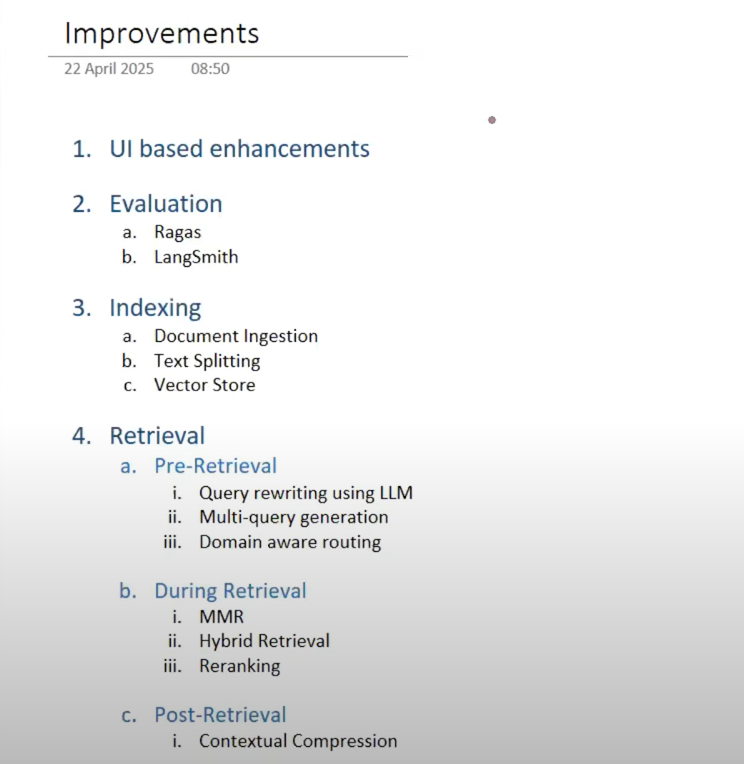

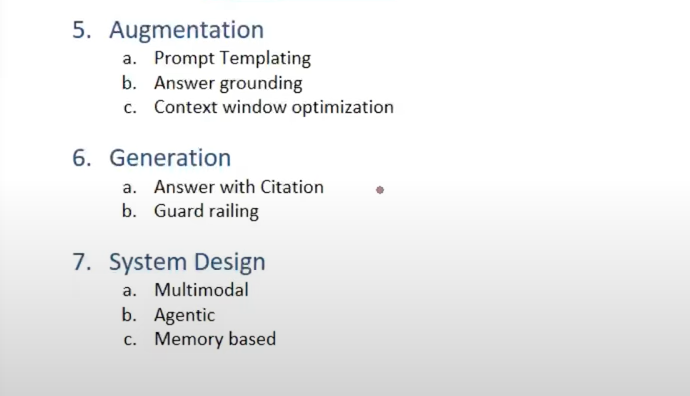